In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-sun-spot-data-1818-to-2019/sunspot_data.csv
/kaggle/input/sunspots/Sunspots.csv


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import shap

# Data Cleaning

In [9]:
data = pd.read_csv('/kaggle/input/daily-sun-spot-data-1818-to-2019/sunspot_data.csv')
data.head()

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,0,1818,1,1,1818.001,-1,-1.0,0,1
1,1,1818,1,2,1818.004,-1,-1.0,0,1
2,2,1818,1,3,1818.007,-1,-1.0,0,1
3,3,1818,1,4,1818.010,-1,-1.0,0,1
4,4,1818,1,5,1818.012,-1,-1.0,0,1


In [10]:
data.describe()

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
count,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000,73718.000000
mean,36858.500000,1918.416750,6.518896,15.729347,1918.916406,79.248732,6.924587,4.429678,0.998331
std,21280.697909,58.264401,3.447114,8.800032,58.264520,77.470942,4.778793,7.884112,0.040814
min,0.000000,1818.000000,1.000000,1.000000,1818.001000,-1.000000,-1.000000,0.000000,0.000000
25%,18429.250000,1868.000000,4.000000,8.000000,1868.458500,15.000000,3.000000,1.000000,1.000000
50%,36858.500000,1918.000000,7.000000,16.000000,1918.917500,58.000000,6.600000,1.000000,1.000000
75%,55287.750000,1969.000000,10.000000,23.000000,1969.373250,125.000000,10.000000,1.000000,1.000000
max,73717.000000,2019.000000,12.000000,31.000000,2019.832000,528.000000,77.700000,60.000000,1.000000


In [11]:
data = data[ data['Number of Sunspots'] > 0]
data.shape

(59370, 9)

# Data Visualization

In [12]:
group2 = data.groupby([data['Year'].astype(int),data['Month'].astype(int),data['Day'].astype(int)]).sum()
group2.head()

Unnamed: 0  Year  Month  Day  Date In Fraction Of Year  \
Year Month Day                                                           
1818 1     8             7  1818      1    8                  1818.021   
           13           12  1818      1   13                  1818.034   
           17           16  1818      1   17                  1818.045   
           18           17  1818      1   18                  1818.048   
           19           18  1818      1   19                  1818.051   

                Number of Sunspots  Standard Deviation  Observations  \
Year Month Day                                                         
1818 1     8                    65                10.2             1   
           13                   37                 7.7             1   
           17                   77                11.1             1   
           18                   98                12.6             1   
           19                  105                13.0             1   

                Indicator  
Year Month Day             
1818 1     8            1  
           13           1  
           17           1  
           18           1  
           19           1

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (59370).

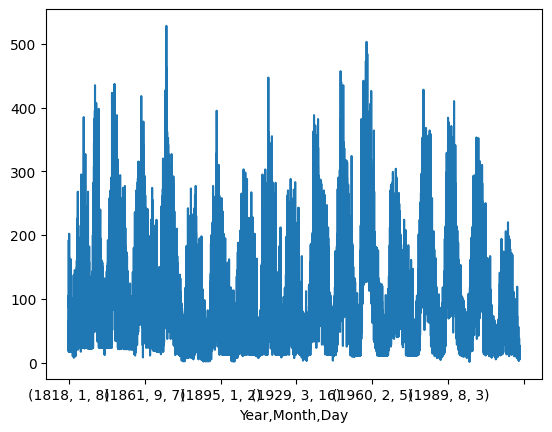

In [17]:
ax = group2['Number of Sunspots'].plot()

ax.set_xticklabels(["%s-%i-%i" % item for item in group2.index.tolist()],
rotation=45, ha='center')

plt.show()

In [20]:
lst = group2.index.tolist()
lst[0:2]

[(1818, 1, 8), (1818, 1, 13)]